<a href="https://colab.research.google.com/github/mrinaldi2/pytorch_nn/blob/master/notebooks/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Dataset

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Loaded from UCI dataset [MAGIC Gamma Telescope Data Set](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)

1.  fLength:  continuous  # major axis of ellipse [mm]
2.  fWidth:   continuous  # minor axis of ellipse [mm] 
3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
11.  class:    g,h         # gamma (signal), hadron (background)

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df['class'] = (df['class'] == 'g').astype(int)

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


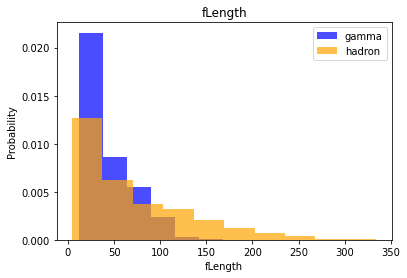

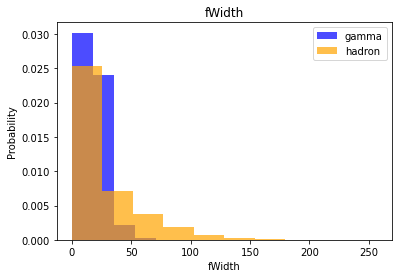

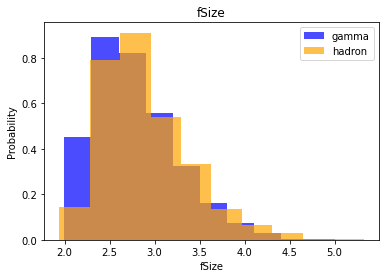

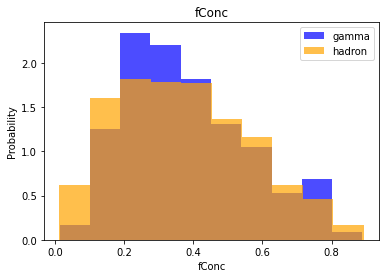

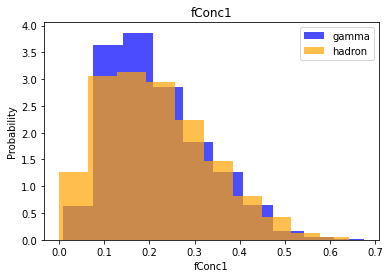

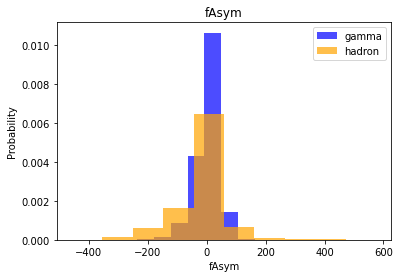

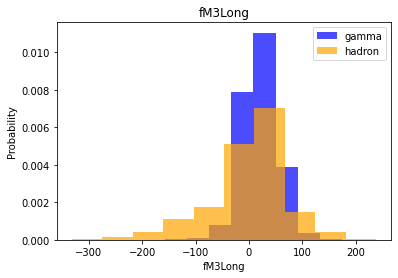

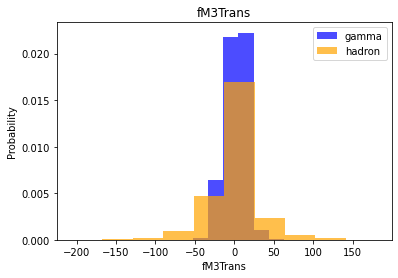

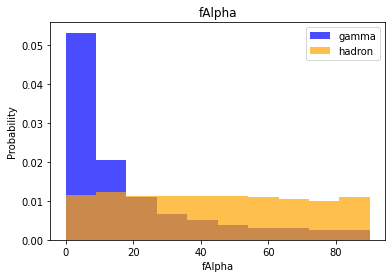

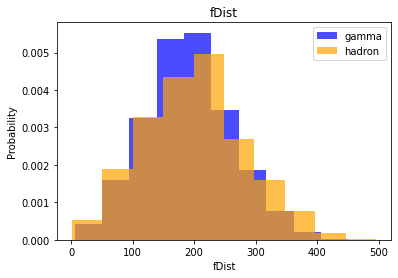

In [10]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df['class'] == 0][label], color="orange", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, Validation, Test Split

In [11]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [32]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X,np.reshape(y, (-1,1))))
  return data, X, y

In [23]:
print(len(train[train['class'] == 0]))
print(len(train[train['class'] == 1]))

4039
7373


In [33]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [37]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [34]:
len(y_train)

14746

In [36]:
sum(y_train == 0)

7373

# kNN

In [44]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn_model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1332
           1       0.85      0.86      0.86      2472

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [48]:
y_pred_nb = nb_model.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.65      0.38      0.48      1332
           1       0.73      0.89      0.80      2472

    accuracy                           0.71      3804
   macro avg       0.69      0.63      0.64      3804
weighted avg       0.70      0.71      0.69      3804



# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

lb_model = LogisticRegression()
lb_model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred_lb = lb_model.predict(X_test)
print(classification_report(y_test,y_pred_lb))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1332
           1       0.85      0.82      0.83      2472

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Model

In [54]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [55]:
y_pred_svm = svc_model.predict(X_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1332
           1       0.88      0.90      0.89      2472

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [74]:
def plot_history(history):
  f1, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label="loss")
  ax1.plot(history.history['val_loss'], label="val_loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Binary CrossEntropy")
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label="accuracy")
  ax2.plot(history.history['val_accuracy'], label="val_accuracy")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Accuracy")
  ax2.legend()
  ax2.grid(True)
  plt.show()

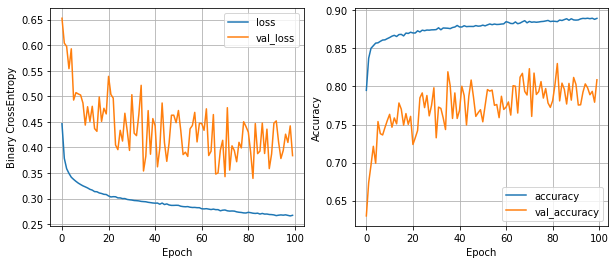

In [75]:
plot_history(history)

In [62]:
from sklearn.utils import optimize
import tensorflow as tf

In [83]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation="relu"),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation="sigmoid")
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy", metrics=['accuracy'])
  history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose = 0)

  return nn_model, history

16 nodes, dropout prob: 0, lr: 0.01, batch size: 32


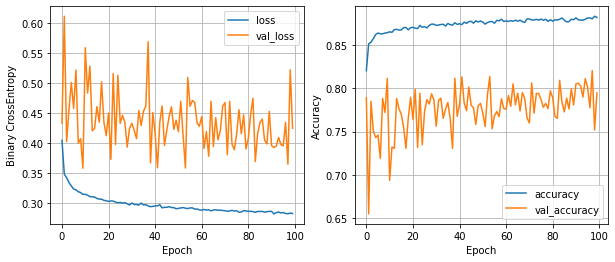

119/119 [==============================] - 0s 955us/step - loss: 0.3330 - accuracy: 0.8770
16 nodes, dropout prob: 0, lr: 0.01, batch size: 64


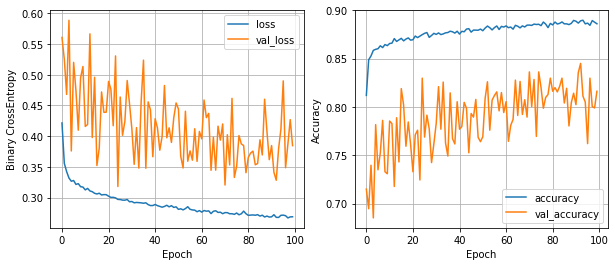

119/119 [==============================] - 0s 986us/step - loss: 0.3051 - accuracy: 0.8793
16 nodes, dropout prob: 0, lr: 0.01, batch size: 128


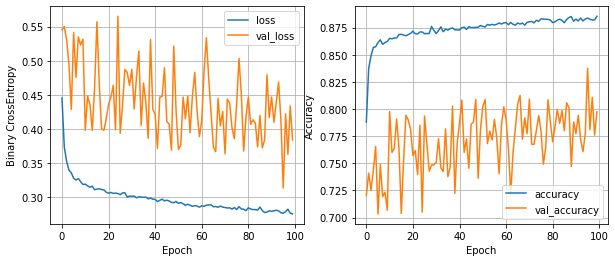

119/119 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8717
16 nodes, dropout prob: 0, lr: 0.005, batch size: 32


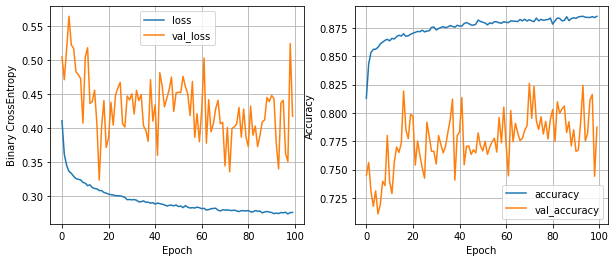

119/119 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8828
16 nodes, dropout prob: 0, lr: 0.005, batch size: 64


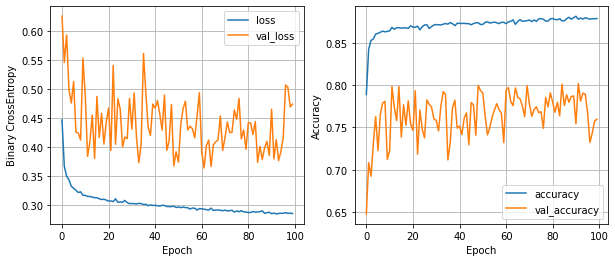

119/119 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.8833
16 nodes, dropout prob: 0, lr: 0.005, batch size: 128


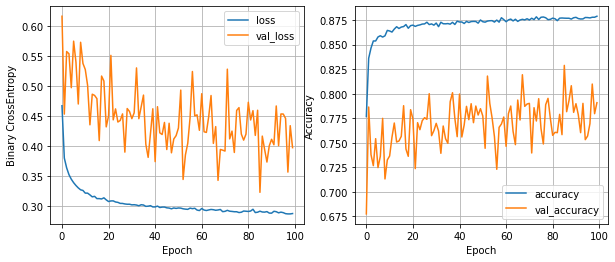

119/119 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8812
16 nodes, dropout prob: 0, lr: 0.001, batch size: 32


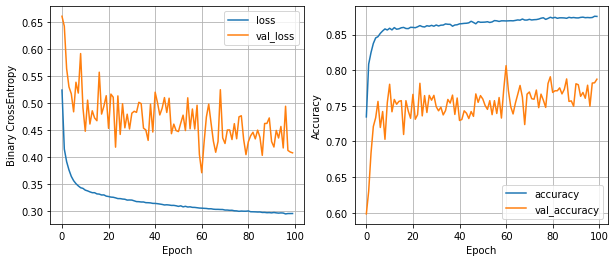

119/119 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8796
16 nodes, dropout prob: 0, lr: 0.001, batch size: 64


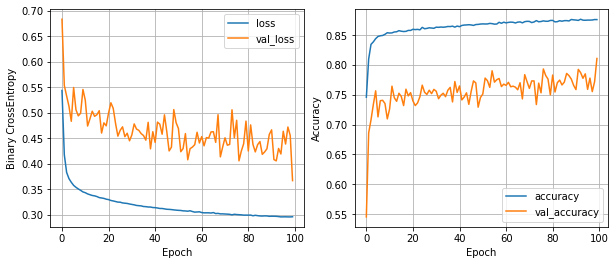

119/119 [==============================] - 0s 1ms/step - loss: 0.3077 - accuracy: 0.8733
16 nodes, dropout prob: 0, lr: 0.001, batch size: 128


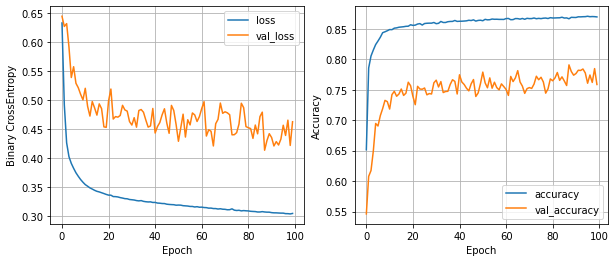

119/119 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.8825
16 nodes, dropout prob: 0.2, lr: 0.01, batch size: 32


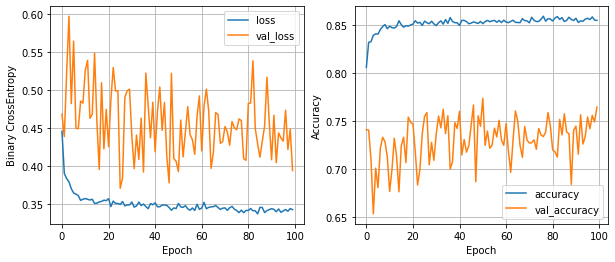

119/119 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8799
16 nodes, dropout prob: 0.2, lr: 0.01, batch size: 64


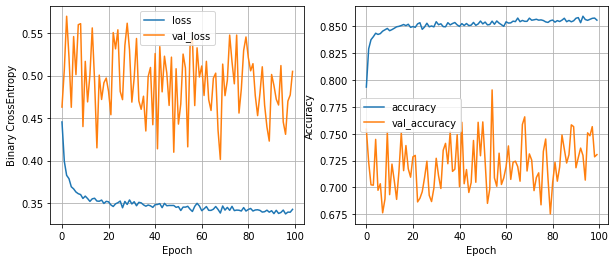

119/119 [==============================] - 0s 1ms/step - loss: 0.3077 - accuracy: 0.8746
16 nodes, dropout prob: 0.2, lr: 0.01, batch size: 128


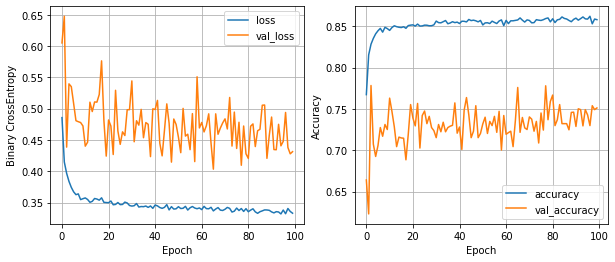

119/119 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8764
16 nodes, dropout prob: 0.2, lr: 0.005, batch size: 32


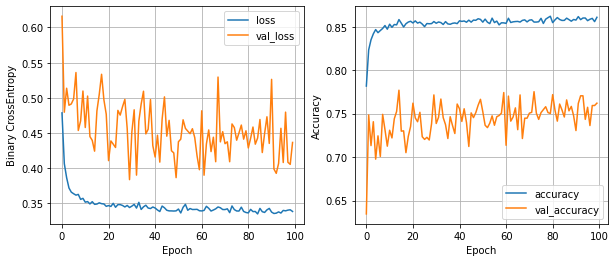

119/119 [==============================] - 0s 1ms/step - loss: 0.3034 - accuracy: 0.8817
16 nodes, dropout prob: 0.2, lr: 0.005, batch size: 64


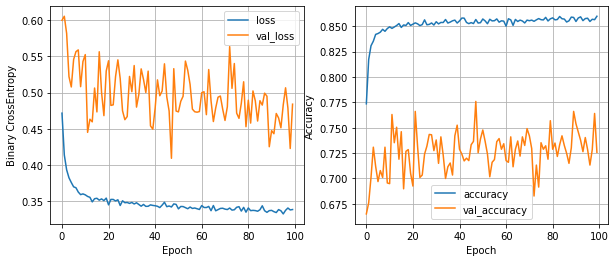

119/119 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8767
16 nodes, dropout prob: 0.2, lr: 0.005, batch size: 128


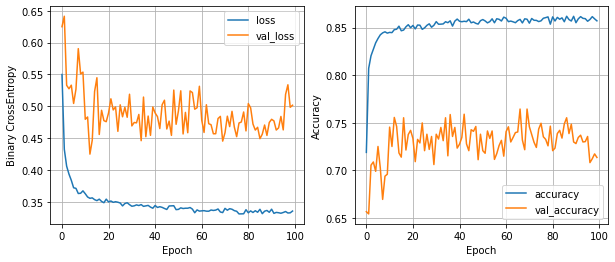

119/119 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.8746
16 nodes, dropout prob: 0.2, lr: 0.001, batch size: 32


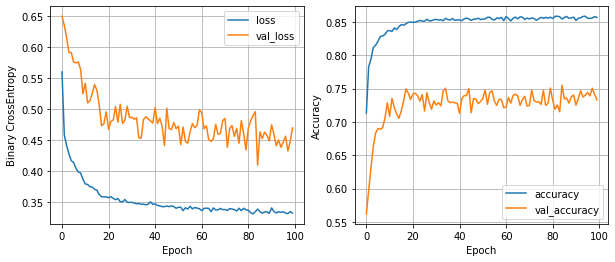

119/119 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8788
16 nodes, dropout prob: 0.2, lr: 0.001, batch size: 64


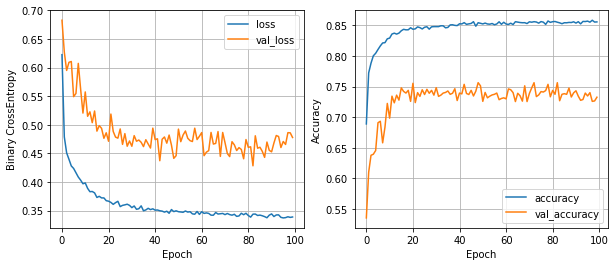

119/119 [==============================] - 0s 1ms/step - loss: 0.3055 - accuracy: 0.8820
16 nodes, dropout prob: 0.2, lr: 0.001, batch size: 128


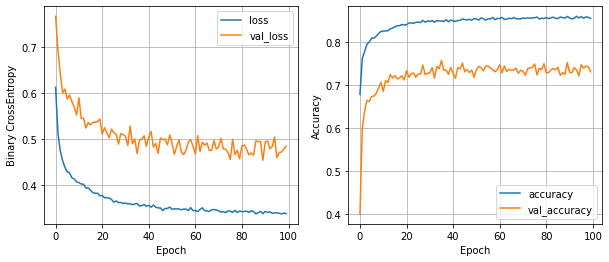

119/119 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8820
32 nodes, dropout prob: 0, lr: 0.01, batch size: 32


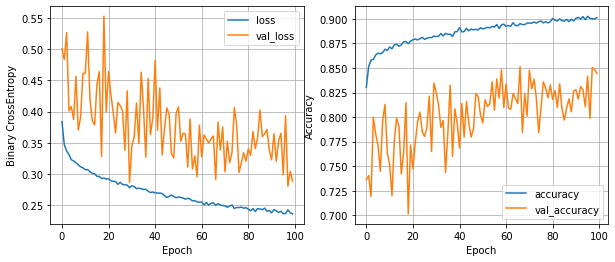

119/119 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8738
32 nodes, dropout prob: 0, lr: 0.01, batch size: 64


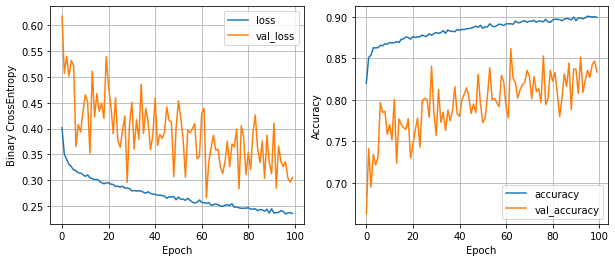

119/119 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8738
32 nodes, dropout prob: 0, lr: 0.01, batch size: 128


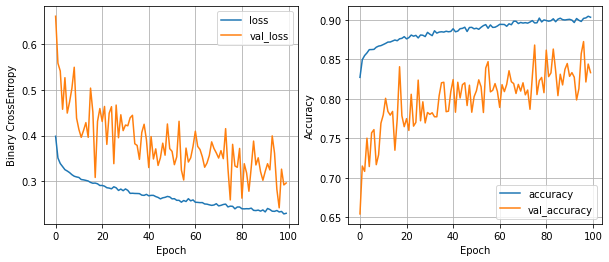

119/119 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8725
32 nodes, dropout prob: 0, lr: 0.005, batch size: 32


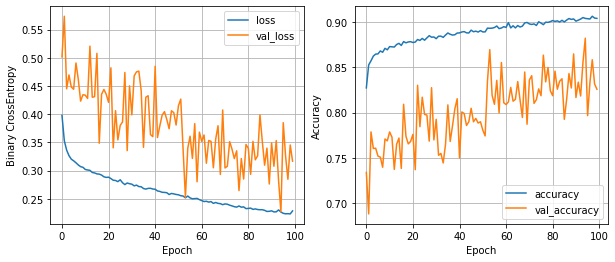

119/119 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8736
32 nodes, dropout prob: 0, lr: 0.005, batch size: 64


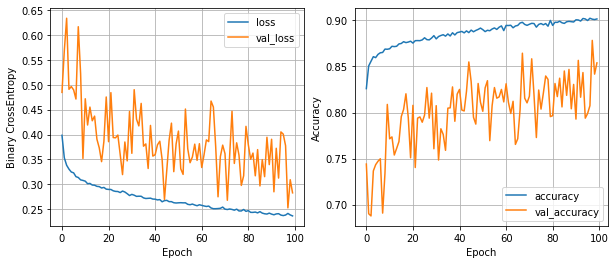

119/119 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8738
32 nodes, dropout prob: 0, lr: 0.005, batch size: 128


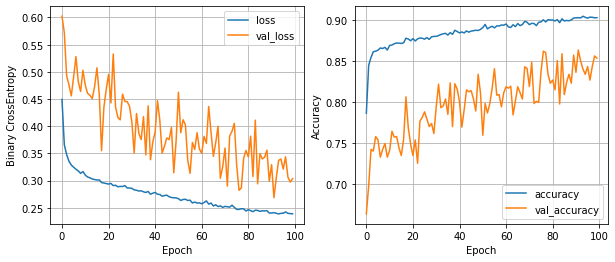

119/119 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8759
32 nodes, dropout prob: 0, lr: 0.001, batch size: 32


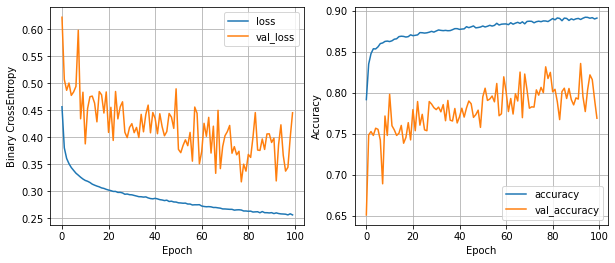

119/119 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.8864
32 nodes, dropout prob: 0, lr: 0.001, batch size: 64


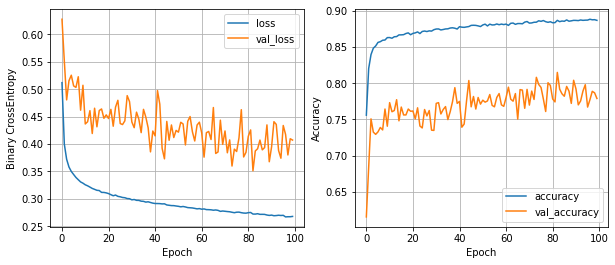

119/119 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.8851
32 nodes, dropout prob: 0, lr: 0.001, batch size: 128


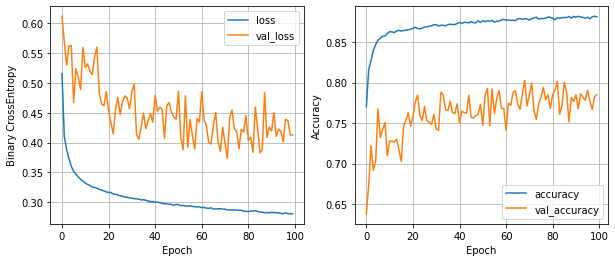

119/119 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8822
32 nodes, dropout prob: 0.2, lr: 0.01, batch size: 32


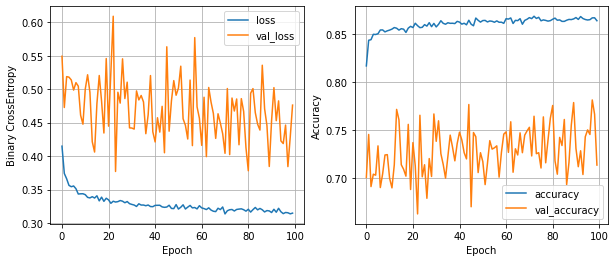

119/119 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.8738
32 nodes, dropout prob: 0.2, lr: 0.01, batch size: 64


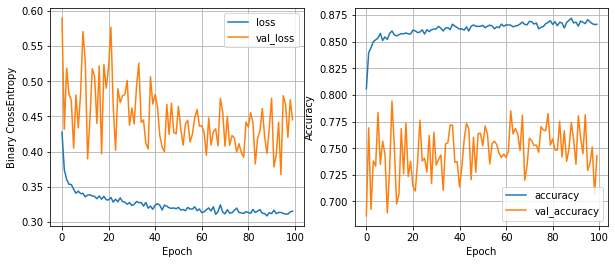

119/119 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 0.8814
32 nodes, dropout prob: 0.2, lr: 0.01, batch size: 128


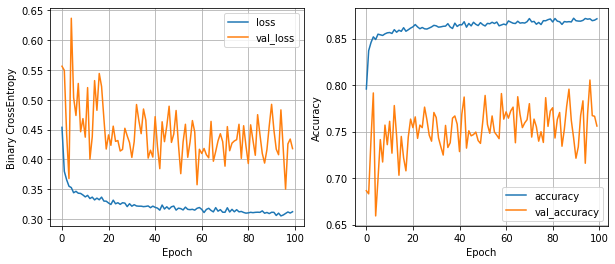

119/119 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 0.8854
32 nodes, dropout prob: 0.2, lr: 0.005, batch size: 32


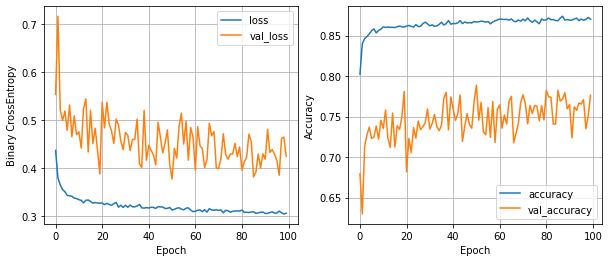

119/119 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8812
32 nodes, dropout prob: 0.2, lr: 0.005, batch size: 64


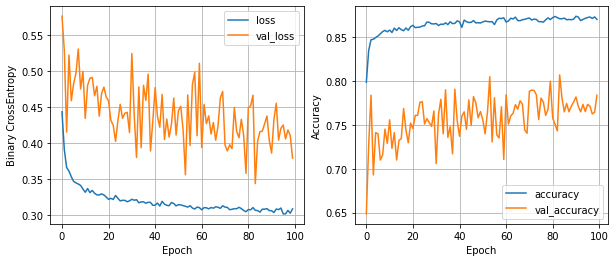

119/119 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8830
32 nodes, dropout prob: 0.2, lr: 0.005, batch size: 128


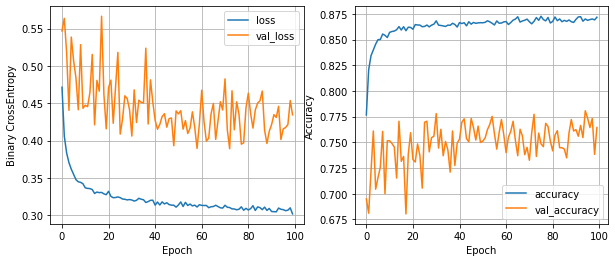

119/119 [==============================] - 0s 1ms/step - loss: 0.2943 - accuracy: 0.8859
32 nodes, dropout prob: 0.2, lr: 0.001, batch size: 32


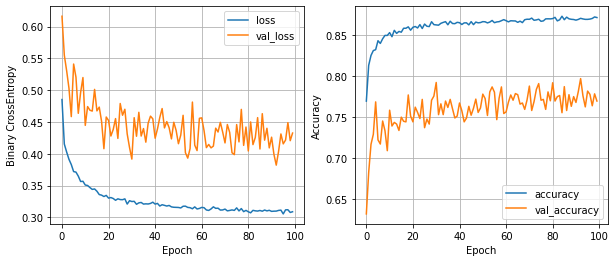

119/119 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8793
32 nodes, dropout prob: 0.2, lr: 0.001, batch size: 64


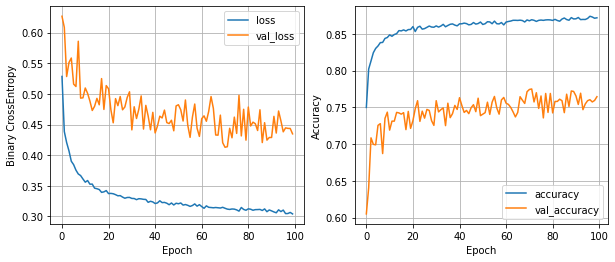

119/119 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.8817
32 nodes, dropout prob: 0.2, lr: 0.001, batch size: 128


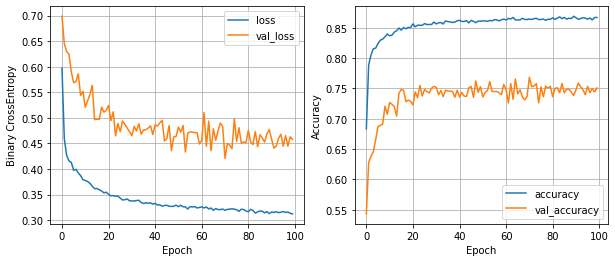

119/119 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8812
64 nodes, dropout prob: 0, lr: 0.01, batch size: 32


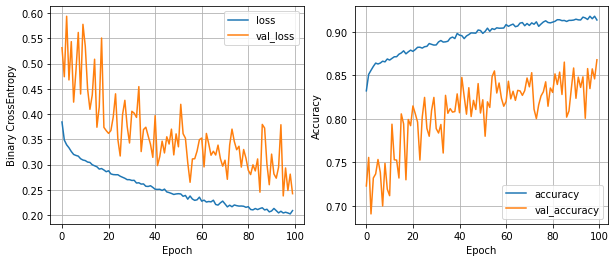

119/119 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8707
64 nodes, dropout prob: 0, lr: 0.01, batch size: 64


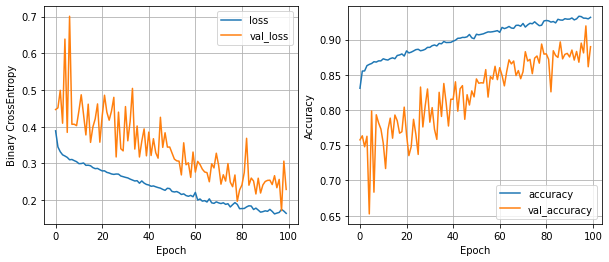

119/119 [==============================] - 0s 1ms/step - loss: 0.5376 - accuracy: 0.8741
64 nodes, dropout prob: 0, lr: 0.01, batch size: 128


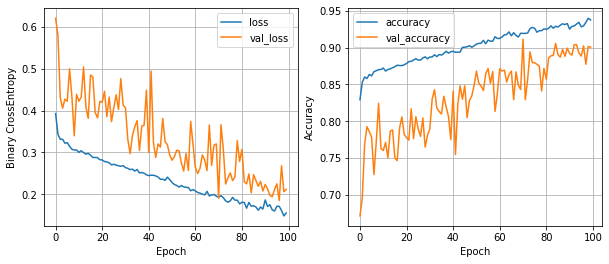

119/119 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.8644
64 nodes, dropout prob: 0, lr: 0.005, batch size: 32


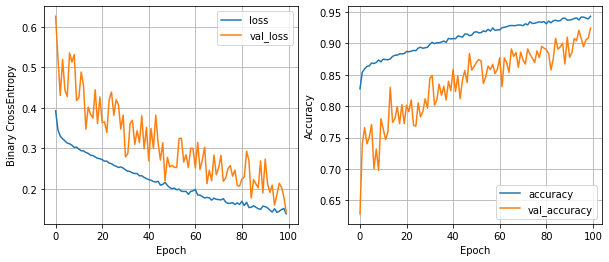

119/119 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.8530
64 nodes, dropout prob: 0, lr: 0.005, batch size: 64


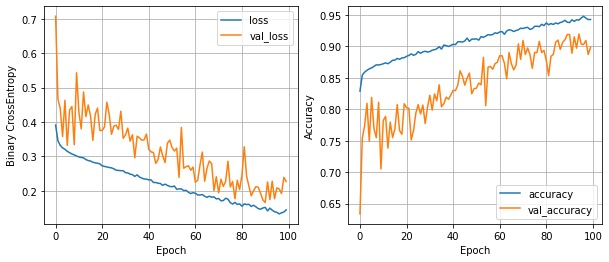

119/119 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.8625
64 nodes, dropout prob: 0, lr: 0.005, batch size: 128


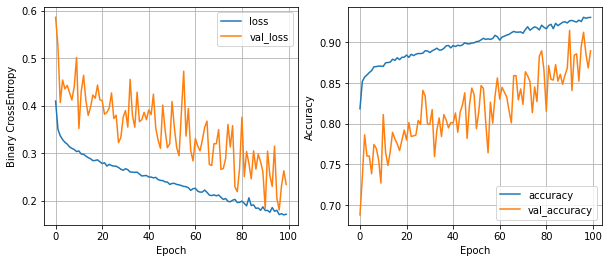

119/119 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.8696
64 nodes, dropout prob: 0, lr: 0.001, batch size: 32


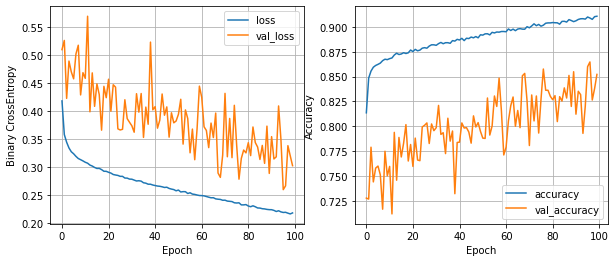

119/119 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8812
64 nodes, dropout prob: 0, lr: 0.001, batch size: 64


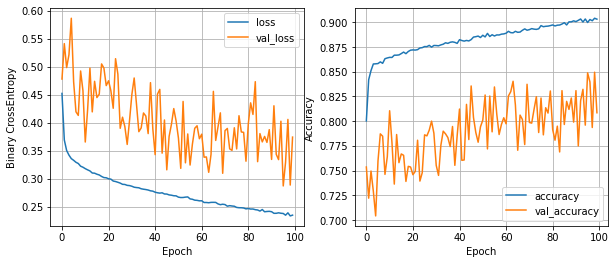

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8833
64 nodes, dropout prob: 0, lr: 0.001, batch size: 128


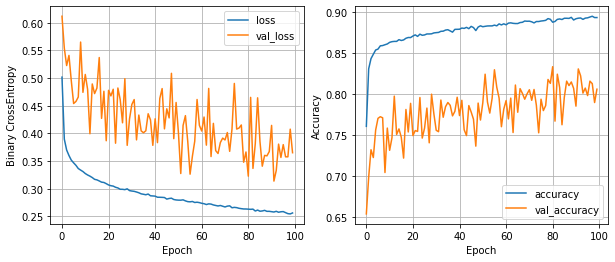

119/119 [==============================] - 0s 1ms/step - loss: 0.3013 - accuracy: 0.8877
64 nodes, dropout prob: 0.2, lr: 0.01, batch size: 32


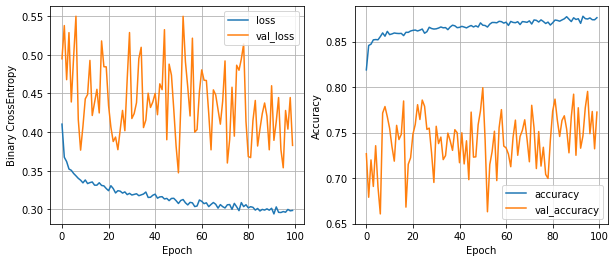

119/119 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.8791
64 nodes, dropout prob: 0.2, lr: 0.01, batch size: 64


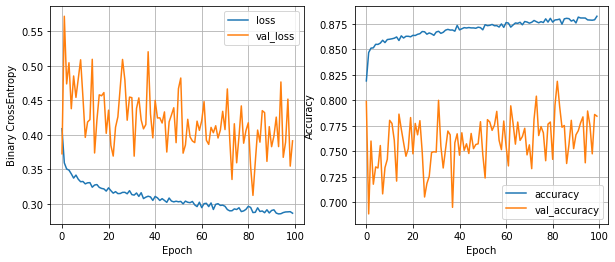

119/119 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8838
64 nodes, dropout prob: 0.2, lr: 0.01, batch size: 128


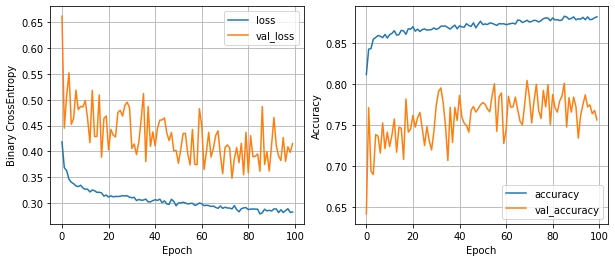

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8807
64 nodes, dropout prob: 0.2, lr: 0.005, batch size: 32


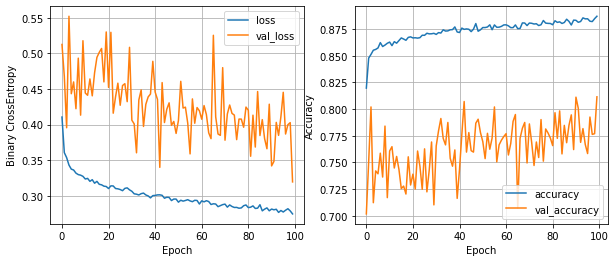

119/119 [==============================] - 0s 1ms/step - loss: 0.3074 - accuracy: 0.8846
64 nodes, dropout prob: 0.2, lr: 0.005, batch size: 64


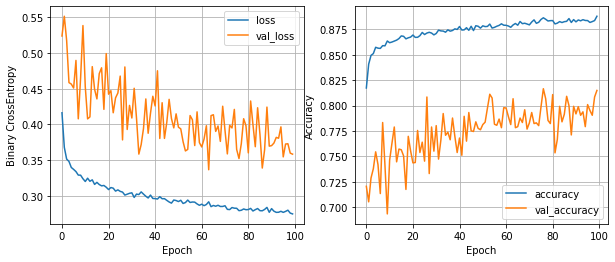

119/119 [==============================] - 0s 1ms/step - loss: 0.2962 - accuracy: 0.8838
64 nodes, dropout prob: 0.2, lr: 0.005, batch size: 128


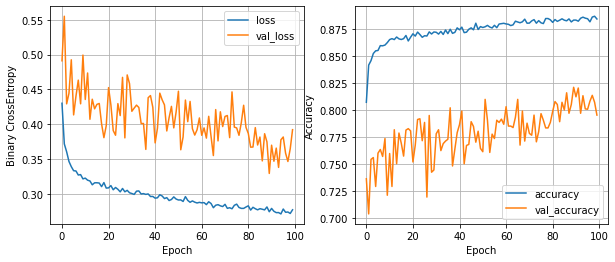

119/119 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8856
64 nodes, dropout prob: 0.2, lr: 0.001, batch size: 32


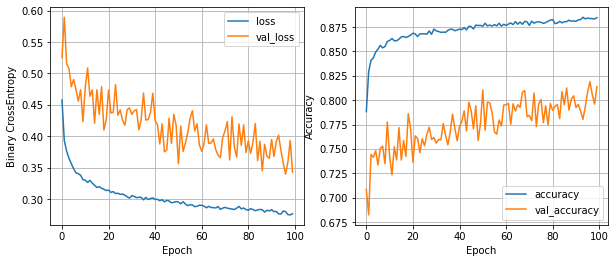

119/119 [==============================] - 0s 1ms/step - loss: 0.2893 - accuracy: 0.8914
64 nodes, dropout prob: 0.2, lr: 0.001, batch size: 64


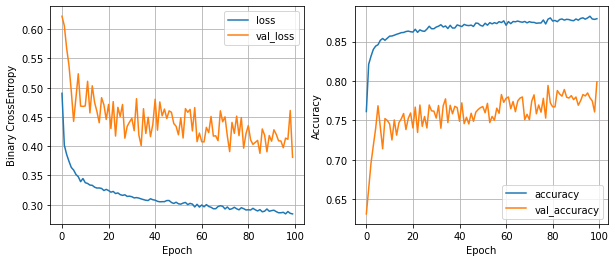

119/119 [==============================] - 0s 1ms/step - loss: 0.2926 - accuracy: 0.8862
64 nodes, dropout prob: 0.2, lr: 0.001, batch size: 128


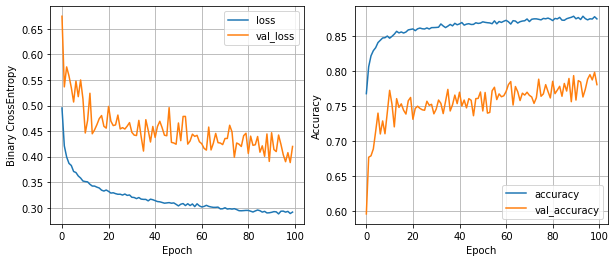

119/119 [==============================] - 0s 1ms/step - loss: 0.2888 - accuracy: 0.8899


In [84]:
least_val_loss = float('inf')
least_val_model = None
epochs = 100
for nodes in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{nodes} nodes, dropout prob: {dropout_prob}, lr: {lr}, batch size: {batch_size}")
        model, history = train_model(X_train, y_train, nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)
        if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0]
          least_val_model = model

In [85]:
y_pred = least_val_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(y_pred)

119/119 [==============================] - 1s 3ms/step
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [86]:
y_pred = y_pred.reshape((-1,))
print(y_pred)

[1 1 1 ... 1 1 1]


In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1332
           1       0.87      0.95      0.91      2472

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.86      3804
weighted avg       0.88      0.87      0.87      3804

